In [112]:
import pandas as pd 
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Reading all scenes detected with yolo

In [74]:
yolo_scenes = pd.read_csv('genre/yolo_scenes.csv').drop('Unnamed: 0', axis=1)

In [75]:
with open('genre/tt0822832.json', 'r') as f:
    json_file = json.load(f)

In [76]:
df_list = []
movie = json_file['film']
for key, scene in json_file.items():
    if key != 'film':
        scene_id = scene['scene']
        for frame in scene['genres']:
            for detection in frame:
                in_dict = {
                    'id': detection['id'],
                    'scene': scene_id,
                    'frame': detection['frame'],
                    'F': detection['F'],
                    'M': detection['M'],
                    'x': detection['x'],
                    'y': detection['y'],
                    'width': detection['width'],
                    'height': detection['height'],
                }
            df_list.append(in_dict)

In [77]:
gender_df = pd.DataFrame(df_list)

#### Only keep rows where gender is quite clear

In [78]:
gender_df = (gender_df[np.abs(gender_df['F'] - gender_df['M']) > 20])

In [79]:
yolo_scenes

,scene,frame,ID,Confidence,img_width,img_height,scene-frame,x,y,width,height,area_norm,offset,num_people,offset_diff,people_size_diff,num_people_diff,label,Objectification
0,tt0822832_scene_10,0,0,0.927024,852,360,tt0822832_scene_10_0,265,0,567,358,0.661796,0.203373,2,0.466853,0.658669,0.666667,Sure,True
1,tt0822832_scene_10,0,1,0.302094,852,360,tt0822832_scene_10_0,771,50,80,80,0.020866,0.730334,2,0.466853,0.658669,0.666667,Sure,True
2,tt0822832_scene_10,1,10,0.925233,852,360,tt0822832_scene_10_1,262,0,573,360,0.672535,0.203335,1,0.203335,0.327465,0.500000,Sure,True
3,tt0822832_scene_10,2,20,0.920848,852,360,tt0822832_scene_10_2,260,0,573,360,0.672535,0.200015,2,0.482981,0.646231,0.666667,Sure,True
4,tt0822832_scene_10,2,21,0.541253,852,360,tt0822832_scene_10_2,763,9,88,122,0.035003,0.765946,2,0.482981,0.646231,0.666667,Sure,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324158,tt0822832_scene_98,999,9993,0.355406,852,360,tt0822832_scene_98_999,682,135,111,149,0.053922,0.529879,4,0.303726,0.870063,0.800000,Hard Neg,False
324159,tt0822832_scene_98,1000,10000,0.902542,852,360,tt0822832_scene_98_1000,541,104,228,252,0.187324,0.427861,4,0.308287,0.882707,0.800000,Hard Neg,False
324160,tt0822832_scene_98,1000,10001,0.615886,852,360,tt0822832_scene_98_1000,429,39,106,313,0.108170,0.111121,4,0.308287,0.882707,0.800000,Hard Neg,False
324161,tt0822832_scene_98,1000,10002,0.480744,852,360,tt0822832_scene_98_1000,676,135,94,174,0.053326,0.519860,4,0.308287,0.882707,0.800000,Hard Neg,False


In [80]:
gender_df.loc[:, 'gender'] = np.where(gender_df.loc[:, 'F'] > gender_df.loc[:, 'M'], 'F', 'M')

In [81]:
yolo_scenes

,scene,frame,ID,Confidence,img_width,img_height,scene-frame,x,y,width,height,area_norm,offset,num_people,offset_diff,people_size_diff,num_people_diff,label,Objectification
0,tt0822832_scene_10,0,0,0.927024,852,360,tt0822832_scene_10_0,265,0,567,358,0.661796,0.203373,2,0.466853,0.658669,0.666667,Sure,True
1,tt0822832_scene_10,0,1,0.302094,852,360,tt0822832_scene_10_0,771,50,80,80,0.020866,0.730334,2,0.466853,0.658669,0.666667,Sure,True
2,tt0822832_scene_10,1,10,0.925233,852,360,tt0822832_scene_10_1,262,0,573,360,0.672535,0.203335,1,0.203335,0.327465,0.500000,Sure,True
3,tt0822832_scene_10,2,20,0.920848,852,360,tt0822832_scene_10_2,260,0,573,360,0.672535,0.200015,2,0.482981,0.646231,0.666667,Sure,True
4,tt0822832_scene_10,2,21,0.541253,852,360,tt0822832_scene_10_2,763,9,88,122,0.035003,0.765946,2,0.482981,0.646231,0.666667,Sure,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324158,tt0822832_scene_98,999,9993,0.355406,852,360,tt0822832_scene_98_999,682,135,111,149,0.053922,0.529879,4,0.303726,0.870063,0.800000,Hard Neg,False
324159,tt0822832_scene_98,1000,10000,0.902542,852,360,tt0822832_scene_98_1000,541,104,228,252,0.187324,0.427861,4,0.308287,0.882707,0.800000,Hard Neg,False
324160,tt0822832_scene_98,1000,10001,0.615886,852,360,tt0822832_scene_98_1000,429,39,106,313,0.108170,0.111121,4,0.308287,0.882707,0.800000,Hard Neg,False
324161,tt0822832_scene_98,1000,10002,0.480744,852,360,tt0822832_scene_98_1000,676,135,94,174,0.053326,0.519860,4,0.308287,0.882707,0.800000,Hard Neg,False


In [82]:
gender_df = gender_df.rename(columns={'id': 'gender_id', 'x': 'gender_x', 'y': 'gender_y', 'width': 'gender_width', 'height': 'gender_height'})

In [83]:
df = pd.merge(yolo_scenes, gender_df, on=['scene', 'frame'], how='inner')
df['x'] = df['x']/df['img_width']
df['y'] = df['y']/df['img_height']
df['width'] = df['width']/df['img_width']
df['height'] = df['height']/df['img_height']

df['gender_x'] = df['gender_x']/df['img_width']
df['gender_y'] = df['gender_y']/df['img_height']
df['gender_width'] = df['gender_width']/df['img_width']
df['gender_height'] = df['gender_height']/df['img_height']

In [85]:
def calculate_iou_vectorized(df):
    x1_inter = df[['x', 'gender_x']].max(axis=1)
    y1_inter = df[['y', 'gender_y']].max(axis=1)
    x2_inter = (df['x'] + df['width']).clip(upper=(df['gender_x'] + df['gender_width']))
    y2_inter = (df['y'] + df['height']).clip(upper=(df['gender_y'] + df['gender_height']))

    inter_width = (x2_inter - x1_inter).clip(lower=0)
    inter_height = (y2_inter - y1_inter).clip(lower=0)
    intersection = inter_width * inter_height

    area_coco = df['width'] * df['height']
    area_yolo = df['gender_width'] * df['gender_height']
    union = area_coco + area_yolo - intersection

    return intersection / union 

In [86]:
df['IoU'] = calculate_iou_vectorized(df)

In [87]:
df

,scene,frame,ID,Confidence,img_width,img_height,scene-frame,x,y,width,...,Objectification,gender_id,F,M,gender_x,gender_y,gender_width,gender_height,gender,IoU
0,tt0822832_scene_10,4,40,0.926208,852,360,tt0822832_scene_10_4,0.291080,0.000000,0.670188,...,True,tt0822832_scene_10_4_0,15.136690,84.863305,0.00000,0.000000,0.998826,0.997222,M,0.669106
1,tt0822832_scene_10,4,41,0.583727,852,360,tt0822832_scene_10_4,0.886150,0.013889,0.112676,...,True,tt0822832_scene_10_4_0,15.136690,84.863305,0.00000,0.000000,0.998826,0.997222,M,0.039279
2,tt0822832_scene_10,7,70,0.939793,852,360,tt0822832_scene_10_7,0.285211,0.000000,0.667840,...,True,tt0822832_scene_10_7_0,15.843056,84.156948,0.00000,0.000000,0.998826,0.997222,M,0.666763
3,tt0822832_scene_10,7,71,0.705687,852,360,tt0822832_scene_10_7,0.868545,0.005556,0.130282,...,True,tt0822832_scene_10_7_0,15.843056,84.156948,0.00000,0.000000,0.998826,0.997222,M,0.047233
4,tt0822832_scene_10,26,260,0.918191,852,360,tt0822832_scene_10_26,0.231221,0.000000,0.652582,...,True,tt0822832_scene_10_26_0,15.264565,84.735435,0.00000,0.000000,0.998826,0.997222,M,0.652162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11442,tt0822832_scene_98,955,9552,0.555751,852,360,tt0822832_scene_98_955,0.842723,0.172222,0.156103,...,False,tt0822832_scene_98_955_0,9.747048,90.252960,0.00000,0.000000,0.998826,0.997222,M,0.126248
11443,tt0822832_scene_98,964,9640,0.877988,852,360,tt0822832_scene_98_964,0.834507,0.216667,0.164319,...,False,tt0822832_scene_98_964_0,37.062988,62.937015,0.56338,0.491667,0.096244,0.227778,M,0.000000
11444,tt0822832_scene_98,964,9641,0.485919,852,360,tt0822832_scene_98_964,0.585681,0.002778,0.323944,...,False,tt0822832_scene_98_964_0,37.062988,62.937015,0.56338,0.491667,0.096244,0.227778,M,0.052335
11445,tt0822832_scene_98,964,9642,0.446518,852,360,tt0822832_scene_98_964,0.296948,0.019444,0.275822,...,False,tt0822832_scene_98_964_0,37.062988,62.937015,0.56338,0.491667,0.096244,0.227778,M,0.007467


In [97]:
max_iou_df = df.loc[df.groupby('gender_id')['IoU'].idxmax()]
max_iou_df.reset_index(drop=True, inplace=True)
max_iou_df = max_iou_df[['gender_id', 'Confidence', 'gender', 'Objectification']]

In [102]:
men_df = max_iou_df[max_iou_df['gender']=='M']
women_df = max_iou_df[max_iou_df['gender']=='F']

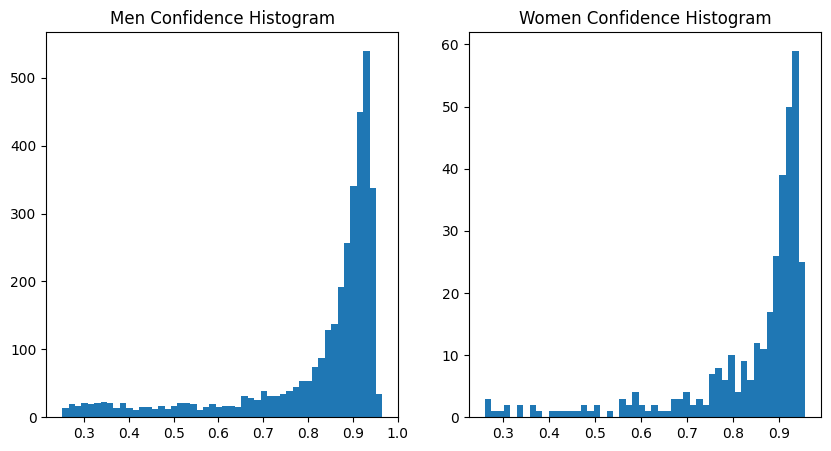

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(men_df['Confidence'], bins=50)
plt.title('Men Confidence Histogram')

plt.subplot(1, 2, 2)
plt.hist(women_df['Confidence'], bins=50)
plt.title('Women Confidence Histogram')
plt.show()


In [ ]:

stat, p_value = stats.ks_2samp(men_df['Confidence'], women_df['Confidence'])

print(f"Statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print('Distributions are similar (null hypothesis is not confuted)')
else:
    print('Distributions are different (null hypothesis is rejected)')


Statistic: 0.05469286172178438
P-value: 0.29338329294795085
Distributions are similar (null hypothesis is not confuted)
